In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [5]:
df.shape

(27481, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
df.dropna(subset=['text','selected_text'], inplace=True)

In [8]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
df=df.drop(['textID','selected_text'],axis=1)

In [10]:
df.describe().transpose()

,count,unique,top,freq
text,27480,27480,Going to French. Anyone want to pick me up?,1
sentiment,27480,3,neutral,11117


percentage of sentiments categories
neutral     40.455
positive    31.230
negative    28.315
Name: sentiment, dtype: float64


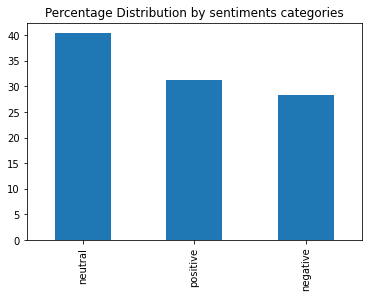

In [11]:
print("percentage of sentiments categories")
print(round(df.sentiment.value_counts(normalize=True)*100,3))
round(df.sentiment.value_counts(normalize=True)*100,3) .plot(kind="bar")
plt.title("Percentage Distribution by sentiments categories")
plt.show()

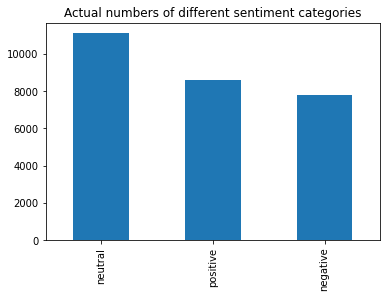

In [ ]:
#my_sentiments = ['neutral','positive','negative']
#plt.figure(figsize=(10,4))
plt.title("Actual numbers of different sentiment categories")
df.sentiment.value_counts().plot(kind='bar')


In [15]:
#Apply Text pre-processing
import re
import string

In [16]:
def clean_text1(text):
  text=text.lower()
  text=re.sub('\[.*\]','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub('[''"",,]','',text)
  text=re.sub('\n','',text)
  return text
cleantext = lambda x : clean_text1(x)

In [17]:
df['cleaned_text']=pd.DataFrame(df.text.apply(cleantext))

In [18]:
df.head()

,text,sentiment,cleaned_text
0,"I`d have responded, if I were going",neutral,id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons of why couldnt they put them on the rel...


In [19]:
df_new=df[['cleaned_text','sentiment']]

In [21]:
df_new.head()

,cleaned_text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


In [22]:
#from sklearn.model_selection import train_test_split
x_train=df_new.cleaned_text
y_train=df_new.sentiment
print(x_train.shape)
print(y_train.shape)

(27480,)
(27480,)


In [23]:
test=pd.read_csv("test.csv")

In [24]:
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [25]:
test=test.drop(['textID'],axis=1)

In [26]:
test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [27]:
test['cleaned_text']=pd.DataFrame(test.text.apply(cleantext))

In [28]:
test.head()

,text,sentiment,cleaned_text
0,Last session of the day http://twitpic.com/67ezh,neutral,last session of the day
1,Shanghai is also really exciting (precisely -...,positive,shanghai is also really exciting precisely s...
2,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho she has to ...
3,happy bday!,positive,happy bday
4,http://twitpic.com/4w75p - I like it!!,positive,i like it


In [29]:
test_new=test[['cleaned_text','sentiment']]

In [30]:
test_new.head()

,cleaned_text,sentiment
0,last session of the day,neutral
1,shanghai is also really exciting precisely s...,positive
2,recession hit veronique branquinho she has to ...,negative
3,happy bday,positive
4,i like it,positive


In [31]:
x_test=test_new.cleaned_text
y_test=test_new.sentiment
print(x_test.shape)
print(y_test.shape)

(3534,)
(3534,)


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',  MultinomialNB(alpha=1.0, fit_prior=True)),
               ])          
nb.fit(x_train, y_train)
from sklearn.metrics import classification_report,accuracy_score
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6239388794567062
              precision    recall  f1-score   support

    negative       0.80      0.37      0.51      1001
     neutral       0.53      0.87      0.66      1430
    positive       0.81      0.54      0.65      1103

    accuracy                           0.62      3534
   macro avg       0.71      0.59      0.60      3534
weighted avg       0.69      0.62      0.61      3534



In [38]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
 }
clf = GridSearchCV(nb, grid_params, cv=5, n_jobs=-1)
clf.fit(x_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.612372634643377
Best Params:  {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=9, tol=None)),
               ])
sgd.fit(x_train, y_train)

#%%time

y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6825127334465195
              precision    recall  f1-score   support

    negative       0.73      0.56      0.63      1001
     neutral       0.62      0.73      0.67      1430
    positive       0.74      0.73      0.74      1103

    accuracy                           0.68      3534
   macro avg       0.70      0.67      0.68      3534
weighted avg       0.69      0.68      0.68      3534

